# Exercise 2 

## Code the Euler Solvers

Implement both the simple and improved Euler solver in Julia. Code them, so that their input arguments are the rhs of the differential equation, parameters of the rhs and initial conditions.

In [1]:
import Pkg 
Pkg.activate(".")
Pkg.add(["Plots", "DifferentialEquations", "BenchmarkTools"])

  Activating project at `~/code/TUM-Dynamics-Lecture/exercises/exercise-2`
   Resolving package versions...
  No Changes to `~/code/TUM-Dynamics-Lecture/exercises/exercise-2/Project.toml`
  No Changes to `~/code/TUM-Dynamics-Lecture/exercises/exercise-2/Manifest.toml`


In [2]:
"""
    simple_euler_solve(rhs, θ, x0, Δt, tspan)

Solves the differential equation with the right hand side `rhs` at parameters `\\theta` from initial conditions with a simple Euler solver 
within the time interval `tspan` and timestep `\\Delta t`. Returns a tuple `t, x(t)`.
"""
function simple_euler_solve(rhs, θ, x0::AbstractArray{T}, Δt, tspan) where {T}
    t = tspan[1]:Δt:tspan[2]  # time axis

    x = zeros(T, size(x0)..., length(t))  # pre-allocate memory for the trajectory  
    x[:,1] = x0  # set the initial condition 

    for i in 2:length(t)  # the simple Euler Loop
        x[:,i] = x[:,i-1] + Δt .* rhs(x[:,i-1], θ, t[i]) 
    end

    return t, x
end

"""
    improved_euler_solve(rhs, θ, x0, Δt, tspan)

Solves the differential equation with the right hand side `rhs` at parameters `\\theta` from initial conditions with an improved Euler solver 
within the time interval `tspan` and timestep `\\Delta t`. Returns a tuple `t, x(t)`.
"""
function improved_euler_solve(rhs, θ, x0, Δt, tspan)
    t = tspan[1]:Δt:tspan[2]  # time axis 

    x = zeros(eltype(x0), size(x0)..., length(t))  # pre allocate memory for the trajectory  
    x[:,1] = x0  # set the initial condition 

    for i in 2:length(t)  # the improved Euler Loop
        x_trial = x[:,i-1] + Δt * rhs(x[:,i-1], θ, t[i])  # trial step 
        x[:,i] = x[:,i-1] + 0.5 * (rhs(x[:,i-1], θ, t[i]) + rhs(x_trial, θ, t[i])) * Δt  # improved Euler step
    end

    return t, x
end

improved_euler_solve

In [3]:
?simple_euler_solve

search: simple_euler_solve improved_euler_solve



```
simple_euler_solve(rhs, θ, x0, Δt, tspan)
```

Solves the differential equation with the right hand side `rhs` at parameters `\theta` from initial conditions with a simple Euler solver  within the time interval `tspan` and timestep `\Delta t`. Returns a tuple `t, x(t)`.


Now we can put these solvers to a test

## Test Your Solvers with the Lotka-Volterra System

Now, test your solvers by integrating the Lotka-Volterra system (LV), modelling predetator-prey dynamics. In this model the prey, here rabbits, have unlimited food supply but are hunted by predators, here foxes. The predators only hunt the prey, and otherwise die if no prey is available. When $R$ is the amount of rabbits, and $F$ is the amount of foxes, then their population dynamics are described by 

$$\begin{align} \frac{dH}{dt} = \alpha H - \beta H F \\
   \frac{dF}{dt} = -\gamma F + \delta H F \end{align}$$

All parameters are positive, real numbers.

* What could the four different terms in the LV stand for? 

* Integrate the LV from $t_0=0$ to $t_{end}=50$ with $\alpha=1$, $\beta=0.5$, $\gamma=1.$, $\delta=0.2$ and $x_0=[20.,5.]$ 

* Test both solvers for different step sizes $\Delta t =0.01$, $\Delta t =0.05$, $\Delta t=0.1$. What are you observing? 

* Looking at the trajectories you get, can you think of one major short coming of the model? Where is it the most unrealistic? 

### Tips

* The initial conditions (like the states) need to be floating numbers, not integer, so intialize them as floats (e.g. `[20., 20.]` instead of `[20, 20]`), otherwise you might run into errors

In [4]:
function lotka_volterra(x, p, t)
    H, F = x
    α, β, γ, δ = p 
    return [α * H - β * H * F, -γ * F + δ * H * F]
end

α = 1.0
β = 0.5
γ = 1.0
δ = 0.2
p = [α, β, γ, δ] 
tspan = (0.0, 50.0)

x0 = [20.0, 5.0]

2-element Vector{Float64}:
 20.0
  5.0

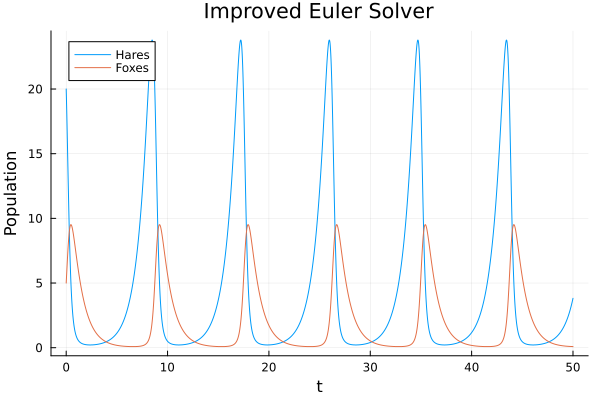

In [5]:
using Plots 

Δt = 0.01
t1, sol1 = simple_euler_solve(lotka_volterra, p, x0, Δt, tspan)
t2, sol2 = improved_euler_solve(lotka_volterra, p, x0, Δt, tspan)

plot(
    t2,
    transpose(sol2),
    xlabel = "t",
    ylabel = "Population",
    title = "Improved Euler Solver",
    label = ["Hares" "Foxes"],
)

First, we just look at one integration from the improved Euler solver to see how the dynamics look like. With the initial condition $x_0$, we start with a state with a lot of prey (blue/green), then the predators hunt these and their population subsequently grows, which leads to a declining prey population. This then leads to the predator population decreasing which again leads to a growing prey population. Now let's compare the two solvers:

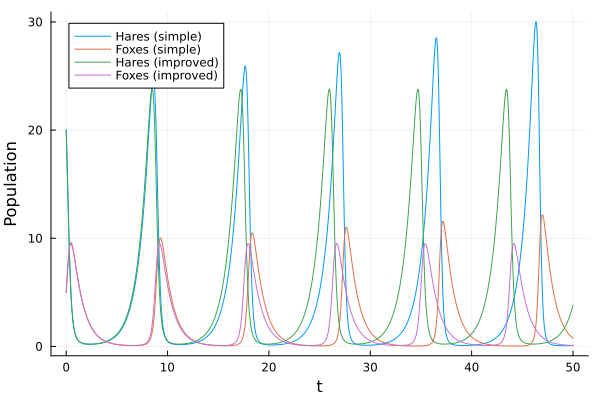

In [6]:
plot(t1, transpose(sol1), xlabel = "t", ylabel = "Population", label = ["Hares (simple)" "Foxes (simple)"])
plot!(t2, transpose(sol2), label = ["Hares (improved)" "Foxes (improved)"])

With both solvers we see oscillations. 

Both can capture the qualitative behaviour we just described at $\Delta t=0.01$, but with increasing time $t$ we see that the larger inaccuracies of the simple Euler solver lead to both trajectories not lining up perfectly after some oscillations.

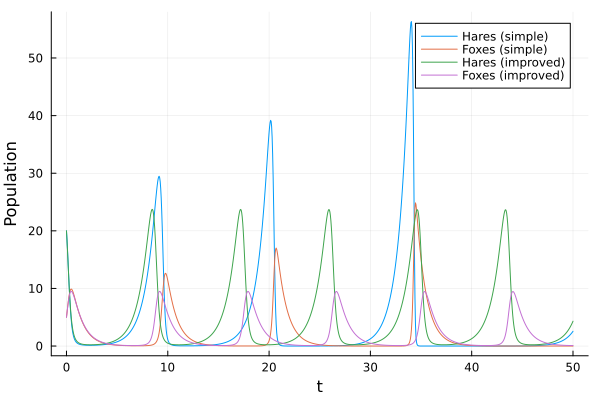

In [7]:
Δt = 0.05
t1, sol1 = simple_euler_solve(lotka_volterra, p, x0, Δt, tspan)
t2, sol2 = improved_euler_solve(lotka_volterra, p, x0, Δt, tspan)

plot(t1, transpose(sol1), xlabel = "t", ylabel = "Population", label = ["Hares (simple)" "Foxes (simple)"])
plot!(t2, transpose(sol2), label = ["Hares (improved)" "Foxes (improved)"])

In this case, for a slightly larger $\Delta t$, the simple Euler solver (blue/red) gets even more inaccuracies, with the prey population massively increasing in each cycle. The improved Euler solver on the other hand returns almost the same trajectory as before 

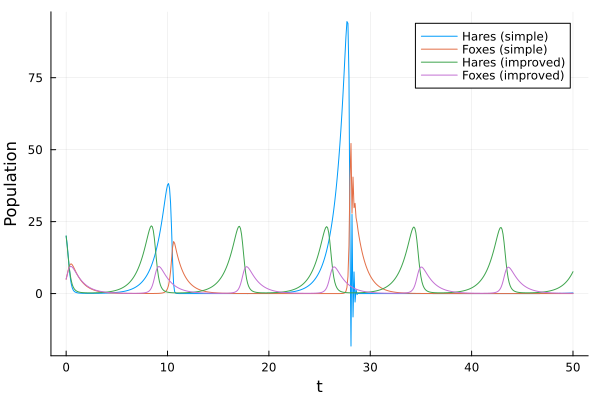

In [8]:
Δt = 0.1
t1, sol1 = simple_euler_solve(lotka_volterra, p, x0, Δt, tspan)
t2, sol2 = improved_euler_solve(lotka_volterra, p, x0, Δt, tspan)

plot(t1, transpose(sol1), xlabel = "t", ylabel = "Population", label = ["Hares (simple)" "Foxes (simple)"])
plot!(t2, transpose(sol2), label = ["Hares (improved)" "Foxes (improved)"])

When we increase $\Delta t$ even further, the simple Euler solver can't integrate the system anymore at all and becomes unstable whereas the improved Euler solver sill remains stable.

One major shortcoming of the model is that the population can recover even if it gets extremely small, as you see in these trajectories. In the real world it is likely that at one of these points the population will just die off as "0.001 rabbits" are not possible. 

## DifferentialEquations.jl 

Now, let's do those with DifferentialEquations.jl. We can reuse definitions from above, because `lotka_volterra` already has the same function signuature that DifferentialEquations.jl needs. Remember, we need a function that either
* `(u, p, t) -> du` the out-of-place formulation for the RHS, or
* `(du, u, p, t) -> nothing` the in-place / mutating formulation for the RHS

We also need the time interval as a Tuple, and initial conditions and parameter vectors in the same way as above. With all of that: 

In [9]:
using DifferentialEquations, BenchmarkTools 

prob = ODEProblem(lotka_volterra, x0, tspan, p) 

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
Non-trivial mass matrix: false
timespan: (0.0, 50.0)
u0: 2-element Vector{Float64}:
 20.0
  5.0

In [10]:
sol_tsit = solve(prob, Tsit5());

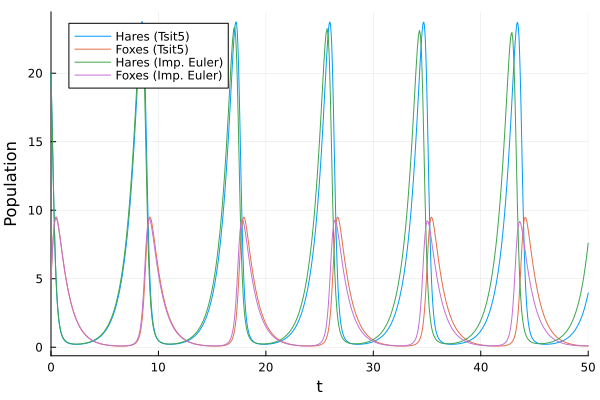

In [11]:
plot(sol_tsit, label = ["Hares (Tsit5)" "Foxes (Tsit5)"])
plot!(t2, transpose(sol2), xlabel = "t", ylabel = "Population", label = ["Hares (Imp. Euler)" "Foxes (Imp. Euler)"])  # that's our improved euler solver from above

In [12]:
sol_tsit = @btime solve(prob, Tsit5());

  431.791 μs (17853 allocations: 707.95 KiB)


In [13]:
t2, sol2 = @btime improved_euler_solve(lotka_volterra, p, x0, Δt, tspan);

  268.028 μs (13004 allocations: 515.84 KiB)


In [14]:
solve(prob, Tsit5(), reltol=1e-1);

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/m1Jrs/src/integrator_interface.jl:589


For `reltol=0.1` the solver noticies the instability of the solution itself. In cases like this we have to decrease the tolerance. The solver was not able to approximate the solution well! 

In [15]:
sol_tsit = @btime solve(prob, Tsit5(), reltol=1e-2);

  311.294 μs (13316 allocations: 529.66 KiB)


In [16]:
sol_tsit = @btime solve(prob, Tsit5(), reltol=1e-3);  # that's the default value for reltol

  442.238 μs (17852 allocations: 707.92 KiB)


In [17]:
sol_tsit = @btime solve(prob, Tsit5(), reltol=1e-5);

  900.965 μs (36335 allocations: 1.42 MiB)


`Tsit5` is a Runge-Kutta solver of 4/5-th accuracy with adaptive stepsize. The higher accuracy comes at a computational cost, so it's natural that the Euler solver is faster. Lower tolerances increase the number of solver the solver takes and therefore also make it slower.